# Marathon Time Prediction

## **Data Exploration**

In [1]:
## import all the necessary libraries
import warnings

#Ignoring unnecessory warnings
warnings.filterwarnings("ignore")                   

import numpy as np #for large and multi-dimensional arrays
import pandas as pd #for data manipulation and analysis

In [2]:
##reading dataset
df = pd.read_csv('../DataSets/MarathonData.csv')
print(df.shape)
df

(87, 10)


,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,NaN,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,NaN,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,NaN,1.30,2.66,A
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,NaN,1.32,2.68,A
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,NaN,1.36,2.74,A
...,...,...,...,...,...,...,...,...,...,...
82,83,Prague17,Stefano Vegliani,M55,50.0,10.830325,NaN,2.02,3.93,D
83,84,Prague17,Andrej Madliak,M40,33.6,10.130653,ciclista 3h,1.94,3.93,D
84,85,Prague17,Yoi Ohsako,M40,55.4,11.043189,NaN,1.94,3.94,D
85,86,Prague17,Simon Dunn,M45,33.2,11.066667,NaN,2.05,3.95,D


## **Data Preparation**

In [3]:
df.shape

(87, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             87 non-null     int64  
 1   Marathon       87 non-null     object 
 2   Name           87 non-null     object 
 3   Category       81 non-null     object 
 4   km4week        87 non-null     float64
 5   sp4week        87 non-null     float64
 6   CrossTraining  13 non-null     object 
 7   Wall21         87 non-null     object 
 8   MarathonTime   87 non-null     float64
 9   CATEGORY       87 non-null     object 
dtypes: float64(3), int64(1), object(6)
memory usage: 6.9+ KB


In [5]:
df = df.drop(columns=['id','Marathon','CATEGORY','Name'])
df.head()

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,NaN,1.16,2.37
1,MAM,68.6,13.674419,NaN,1.23,2.59
2,MAM,82.7,13.520436,NaN,1.30,2.66
3,M45,137.5,12.258544,NaN,1.32,2.68
4,MAM,84.6,13.945055,NaN,1.36,2.74


In [6]:
# now here we here we will handle missing value
df.isna().sum()

Category          6
km4week           0
sp4week           0
CrossTraining    74
Wall21            0
MarathonTime      0
dtype: int64

In [7]:
df['CrossTraining'].fillna('nonct',inplace=True)
df.isna().sum()

Category         6
km4week          0
sp4week          0
CrossTraining    0
Wall21           0
MarathonTime     0
dtype: int64

In [8]:
df

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,nonct,1.16,2.37
1,MAM,68.6,13.674419,nonct,1.23,2.59
2,MAM,82.7,13.520436,nonct,1.30,2.66
3,M45,137.5,12.258544,nonct,1.32,2.68
4,MAM,84.6,13.945055,nonct,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,nonct,2.02,3.93
83,M40,33.6,10.130653,ciclista 3h,1.94,3.93
84,M40,55.4,11.043189,nonct,1.94,3.94
85,M45,33.2,11.066667,nonct,2.05,3.95


In [9]:
df1 = df.dropna(how='any')
df1.isna().sum()

Category         0
km4week          0
sp4week          0
CrossTraining    0
Wall21           0
MarathonTime     0
dtype: int64

In [10]:
# we also need to drop category column also as it has no such preference
df = df.dropna(how='any')
df = df.drop(columns=['Category'])
df.head()

,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,132.8,14.434783,nonct,1.16,2.37
1,68.6,13.674419,nonct,1.23,2.59
2,82.7,13.520436,nonct,1.30,2.66
3,137.5,12.258544,nonct,1.32,2.68
4,84.6,13.945055,nonct,1.36,2.74


In [11]:
df.isna().sum()

km4week          0
sp4week          0
CrossTraining    0
Wall21           0
MarathonTime     0
dtype: int64

In [12]:
df.info() #--------------------------------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 86
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   km4week        81 non-null     float64
 1   sp4week        81 non-null     float64
 2   CrossTraining  81 non-null     object 
 3   Wall21         81 non-null     object 
 4   MarathonTime   81 non-null     float64
dtypes: float64(3), object(2)
memory usage: 3.8+ KB


In [13]:
df['Wall21'] = df['Wall21'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 86
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   km4week        81 non-null     float64
 1   sp4week        81 non-null     float64
 2   CrossTraining  81 non-null     object 
 3   Wall21         81 non-null     float64
 4   MarathonTime   81 non-null     float64
dtypes: float64(4), object(1)
memory usage: 3.8+ KB


In [14]:
df = df.query('sp4week<2000')
df

,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,132.8,14.434783,nonct,1.16,2.37
1,68.6,13.674419,nonct,1.23,2.59
2,82.7,13.520436,nonct,1.30,2.66
3,137.5,12.258544,nonct,1.32,2.68
4,84.6,13.945055,nonct,1.36,2.74
...,...,...,...,...,...
82,50.0,10.830325,nonct,2.02,3.93
83,33.6,10.130653,ciclista 3h,1.94,3.93
84,55.4,11.043189,nonct,1.94,3.94
85,33.2,11.066667,nonct,2.05,3.95


In [15]:
df = pd.get_dummies(df)
df

,km4week,sp4week,Wall21,MarathonTime,CrossTraining_ciclista 13h,CrossTraining_ciclista 1h,CrossTraining_ciclista 3h,CrossTraining_ciclista 4h,CrossTraining_ciclista 5h,CrossTraining_nonct
0,132.8,14.434783,1.16,2.37,0,0,0,0,0,1
1,68.6,13.674419,1.23,2.59,0,0,0,0,0,1
2,82.7,13.520436,1.30,2.66,0,0,0,0,0,1
3,137.5,12.258544,1.32,2.68,0,0,0,0,0,1
4,84.6,13.945055,1.36,2.74,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
82,50.0,10.830325,2.02,3.93,0,0,0,0,0,1
83,33.6,10.130653,1.94,3.93,0,0,1,0,0,0
84,55.4,11.043189,1.94,3.94,0,0,0,0,0,1
85,33.2,11.066667,2.05,3.95,0,0,0,0,0,1


In [16]:
correlated = df.corr().abs()['MarathonTime'].sort_values(ascending=False)
correlated

MarathonTime                  1.000000
Wall21                        0.968751
sp4week                       0.639466
km4week                       0.623238
CrossTraining_ciclista 5h     0.253511
CrossTraining_nonct           0.179470
CrossTraining_ciclista 3h     0.175724
CrossTraining_ciclista 1h     0.141044
CrossTraining_ciclista 13h    0.116998
CrossTraining_ciclista 4h     0.013155
Name: MarathonTime, dtype: float64

In [17]:
correlated = correlated[:5]
correlated

MarathonTime                 1.000000
Wall21                       0.968751
sp4week                      0.639466
km4week                      0.623238
CrossTraining_ciclista 5h    0.253511
Name: MarathonTime, dtype: float64

In [18]:
df = df.loc[:,correlated.index]
df.head()

,MarathonTime,Wall21,sp4week,km4week,CrossTraining_ciclista 5h
0,2.37,1.16,14.434783,132.8,0
1,2.59,1.23,13.674419,68.6,0
2,2.66,1.30,13.520436,82.7,0
3,2.68,1.32,12.258544,137.5,0
4,2.74,1.36,13.945055,84.6,0


## **Data Visualization**

<AxesSubplot:>

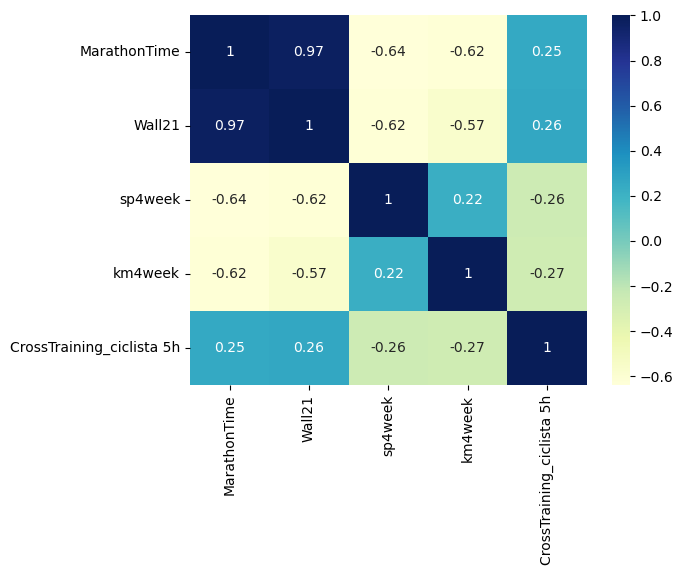

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap = 'YlGnBu')

## **Data Training**

In [20]:
# splitting the X and Y
X = df.drop(columns=['MarathonTime'])
Y = df['MarathonTime']

In [21]:
X

,Wall21,sp4week,km4week,CrossTraining_ciclista 5h
0,1.16,14.434783,132.8,0
1,1.23,13.674419,68.6,0
2,1.30,13.520436,82.7,0
3,1.32,12.258544,137.5,0
4,1.36,13.945055,84.6,0
...,...,...,...,...
82,2.02,10.830325,50.0,0
83,1.94,10.130653,33.6,0
84,1.94,11.043189,55.4,0
85,2.05,11.066667,33.2,0


In [22]:
Y

0     2.37
1     2.59
2     2.66
3     2.68
4     2.74
      ... 
82    3.93
83    3.93
84    3.94
85    3.95
86    3.98
Name: MarathonTime, Length: 80, dtype: float64

In [23]:
# Now we need to split the data for training and testing part
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

# **Model Creation**

### **Linear Regression**

In [24]:
# Importing linear regression model
from sklearn.linear_model import LinearRegression 
reg1 = LinearRegression()

In [25]:
reg1.fit(X_train,y_train)
pred1=reg1.predict(X_test)
pred1

array([3.11289945, 2.97057497, 3.12394137, 3.91584426, 3.19390532,
       3.29861678, 3.13534601, 3.96338696, 2.39433047, 3.10368617,
       2.64529519, 3.18870079, 2.86232455, 2.99315514, 3.58485465,
       3.85971033])

In [26]:
print("Accuracy of the LinearRegression model comes to be: \n ") 
print(reg1.score(X_train,y_train))

Accuracy of the LinearRegression model comes to be: 
 
0.9388132875625024


### **Ridge Regression**

In [27]:
# Importing model
from sklearn.linear_model import Ridge
reg2 = Ridge()

In [28]:
# Fitting data into the model.
reg2.fit(X_train, y_train)
pred2=reg2.predict(X_test)
pred2

array([3.61835183, 3.02775984, 3.20202926, 3.80732814, 3.2658992 ,
       3.34185874, 3.25227439, 3.78596285, 2.41952365, 3.16674464,
       2.83394338, 3.07213578, 2.91468689, 3.09003306, 3.63078833,
       3.62226198])

In [29]:
print("Accuracy of the Ridge Regression model comes to be: \n ") 
print(reg2.score(X_train,y_train))

Accuracy of the Ridge Regression model comes to be: 
 
0.8715524558115283


### **Lasso Regression**

In [31]:
# Importing model
from sklearn.linear_model import Lasso
reg3 = Lasso()

In [32]:
# Fitting data into the model.
reg3.fit(X_train, y_train)
pred3=reg3.predict(X_test)
pred3

array([3.2313074 , 3.23068253, 3.19568939, 3.51937592, 3.33503706,
       3.38502726, 3.3006688 , 3.39814969, 2.88075115, 3.38815165,
       3.28192248, 3.21443571, 3.27317419, 3.12007922, 3.44064135,
       3.37377947])

In [33]:
print("Accuracy of the Lasso Regression model comes to be: \n ") 
print(reg3.score(X_train,y_train))

Accuracy of the Lasso Regression model comes to be: 
 
0.3351070293785229


## **Performance  Evaluation**

In [34]:
import numpy as np
from sklearn.metrics import mean_squared_error
print("Model\t\t\t RootMeanSquareError \t\t Accuracy of the model") 
print("""Linear Regression \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred1)), reg1.score(X_train,y_train)))
print("""Ridge Regression \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred2)), reg2.score(X_train,y_train)))
print("""Lasso Regression \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred3)), reg3.score(X_train,y_train)))

Model			 RootMeanSquareError 		 Accuracy of the model
Linear Regression 		 0.0734 	 		 0.9388
Ridge Regression 		 0.2100 	 		 0.8716
Lasso Regression 		 0.3481 	 		 0.3351


Conclusion: Accuracy of Regression models- Lasso regression, rigde regression is same.

Whereas accuracy of Linear Regression is higher and root mean square error is least.

Linear Regression is more efficient model.